<a href="https://colab.research.google.com/github/codingCapricorn/ML-for-Object-Classification/blob/master/Whiskies_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Loding and inspecting whiskies data -->>

In [1]:
import numpy as np
import pandas as pd

whisky = pd.read_csv("whiskies.txt")
whisky["Region"] = pd.read_csv("regions.txt")
# >>>whisky.head()  #iloc method to index a data frame by location.

# >>>whisky.iloc[0:10] #we specified the rows from 0 - 9
# >>>whisky.iloc[0:10,0:5] #we specified the rows from 0 - 9 & columns from 0-5

# >>>whisky.columns
flavors=whisky.iloc[:,2:14]

corr_flavors = pd.DataFrame.corr(flavors)
print(corr_flavors)

               Body  Sweetness     Smoky  ...     Malty    Fruity    Floral
Body       1.000000  -0.136518  0.524032  ... -0.116859 -0.013205 -0.461203
Sweetness -0.136518   1.000000 -0.405897  ... -0.001516  0.019820  0.144987
Smoky      0.524032  -0.405897  1.000000  ... -0.192875 -0.312970 -0.431663
Medicinal  0.354050  -0.392017  0.686071  ... -0.258959 -0.330975 -0.511323
Tobacco    0.168718  -0.147871  0.365501  ... -0.059347 -0.235145 -0.212375
Honey      0.082031   0.132558 -0.195318  ...  0.310184  0.108822  0.183029
Spicy      0.188500  -0.054200  0.231745  ...  0.036303  0.144714  0.034663
Winey      0.408576   0.115727 -0.028190  ...  0.112368  0.090694 -0.126932
Nutty      0.126323  -0.032493 -0.023132  ...  0.066157  0.071765  0.018302
Malty     -0.116859  -0.001516 -0.192875  ...  1.000000  0.207288  0.106309
Fruity    -0.013205   0.019820 -0.312970  ...  0.207288  1.000000  0.262336
Floral    -0.461203   0.144987 -0.431663  ...  0.106309  0.262336  1.000000

[12 rows x 

2.Exploring Correlations -->>

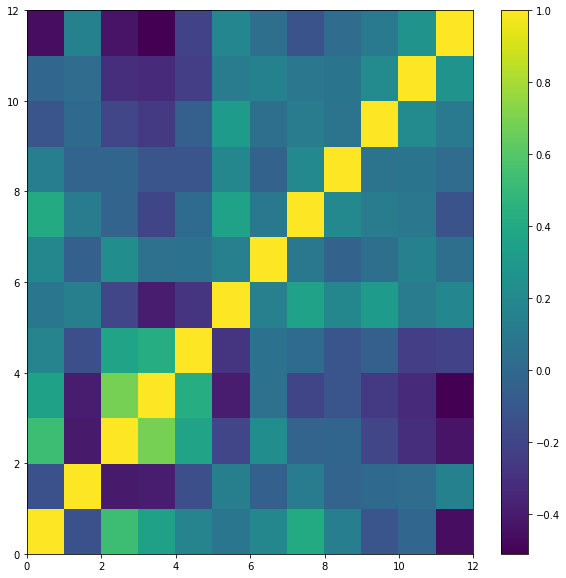

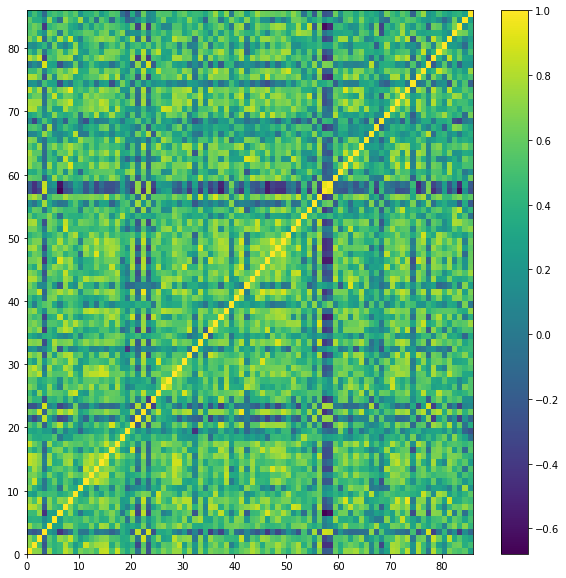

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.pcolor(corr_flavors)
plt.colorbar()
plt.savefig("corlate-whisky1.pdf")

corr_whisky = pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize=(10,10))
plt.pcolor(corr_whisky)
plt.axis("tight")
plt.colorbar()
plt.savefig("corlate-whisky2.pdf")

plt.show()

3.Clustering Whiskies By Flavours-->>

In [9]:
from sklearn.cluster.bicluster import SpectralCoclustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

model = SpectralCoclustering(n_clusters=6, random_state=0)
model.fit(corr_whisky)
model.rows_
np.sum(model.rows_, axis=1)
np.sum(model.rows_, axis=0)
model.row_labels_

array([2, 4, 5, 3, 2, 1, 5, 4, 2, 5, 4, 1, 2, 1, 2, 2, 1, 2, 1, 0, 5, 3,
       5, 3, 5, 5, 4, 4, 5, 4, 5, 2, 1, 1, 1, 2, 4, 5, 1, 0, 1, 5, 4, 4,
       4, 1, 2, 1, 1, 5, 5, 4, 4, 4, 1, 0, 2, 3, 3, 1, 5, 2, 4, 2, 2, 4,
       0, 2, 0, 1, 4, 2, 1, 2, 4, 2, 5, 3, 2, 5, 1, 5, 4, 1, 4, 1],
      dtype=int32)

4.Whiskies Comparing Correlation-->>

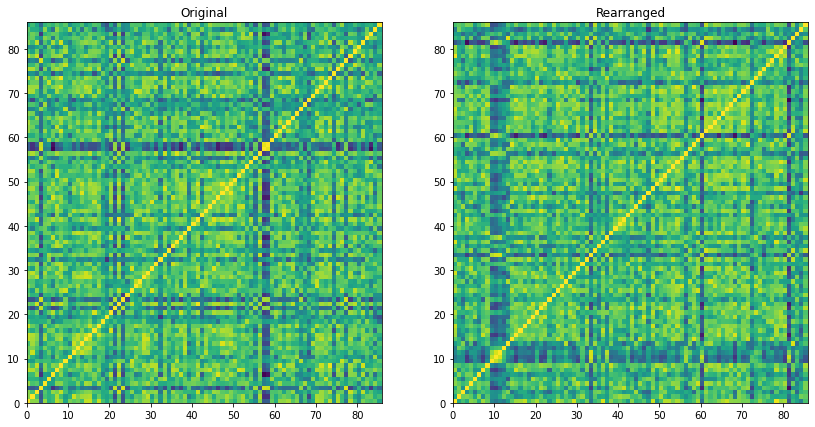

<Figure size 432x288 with 0 Axes>

In [10]:
from sklearn.cluster.bicluster import SpectralCoclustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

whisky['Group'] = pd.Series(model.row_labels_, index = whisky.index)
whisky = whisky.loc[np.argsort(model.row_labels_)]
whisky = whisky.reset_index(drop=True)

correlations = pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())
correlations = np.array(correlations)

plt.figure(figsize = (14,7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis("tight")
plt.show()
plt.savefig("correlations.pdf")